## Tensor

In [1]:
import torch
import numpy as np

### build from native array

In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(f"Tensor from array: \n {x_data} \n")

Tensor from array: 
 tensor([[1, 2],
        [3, 4]]) 



### build from numpy array

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(f"Tensor from numpy: \n {x_np} \n")

Tensor from numpy: 
 tensor([[1, 2],
        [3, 4]], dtype=torch.int32) 



### build from another tensor

In [4]:
x_ones = torch.ones_like(x_data)
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Ones Tensor: \n {x_ones} \n")
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3846, 0.9818],
        [0.9573, 0.9203]]) 



### build from shape

In [5]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.0918, 0.9601, 0.4267],
        [0.5385, 0.9396, 0.1587]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Tensor Attributes

In [6]:
tensor = torch.rand(3, 4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Tensor Operations

### device change

In [7]:
tensor = torch.rand(3, 4)
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cuda:0


### indexing and slicing

In [8]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:, 1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### joining tensors

In [9]:
tensor = torch.ones(4, 4)
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


### arithmetic operations

In [10]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
tensor = torch.ones(4, 4)
y1 = tensor @ tensor.T
print(f"y1: \n {y1} \n")
y2 = tensor.matmul(tensor.T)
print(f"y2: \n {y2} \n")

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)
print(f"y3: \n {y3} \n")

# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
print(f"z1: \n {z1} \n")
z2 = tensor.mul(tensor)
print(f"z2: \n {z2} \n")

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)
print(f"z3: \n {z3} \n")

y1: 
 tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]]) 

y2: 
 tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]]) 

y3: 
 tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]]) 

z1: 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

z2: 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

z3: 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 



### single-element tensors

In [11]:
tensor = torch.ones(4, 4)
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

16.0 <class 'float'>


### in-place operations

In [12]:
tensor = torch.ones(4, 4)
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])


### with numpy

In [13]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


### a change in the tensor reflects in the NumPy array

In [14]:
t = torch.ones(5)
n = t.numpy()
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### a change in the NumPy array reflects in the tensor

In [15]:
n = np.ones(5)
t = torch.from_numpy(n)
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Datasets & DataLoaders

In [16]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

ImportError: DLL load failed while importing _imaging: The specified module could not be found.

### Fashion-MNIST dataset

In [17]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

print(type(training_data))
print(type(test_data))

<class 'torchvision.datasets.mnist.FashionMNIST'>
<class 'torchvision.datasets.mnist.FashionMNIST'>


### Iterating and Visualizing the Dataset

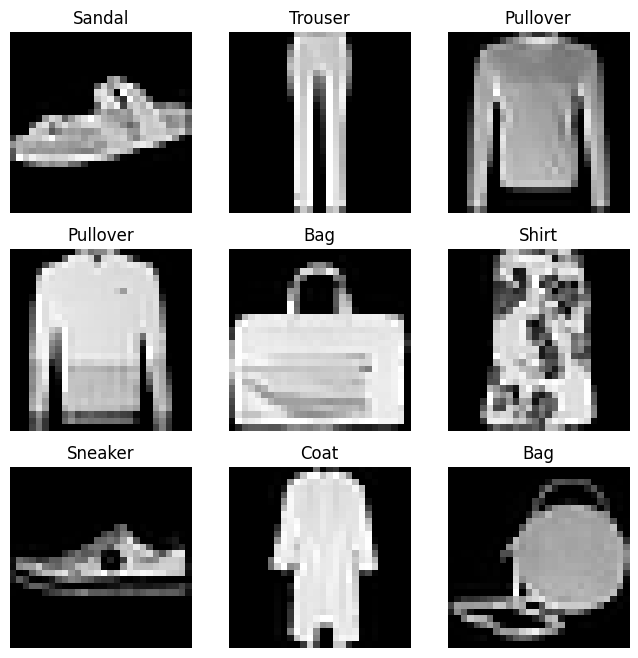

In [18]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### create a custom dataset for your files

In [19]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset


class MyDataset(Dataset):
    def __init__(self):
        pass

    def __len__(self):
        pass

    def __getitem__(self, idx):
        pass

### prepare your data for training with DataLoaders

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([1, 28, 28])


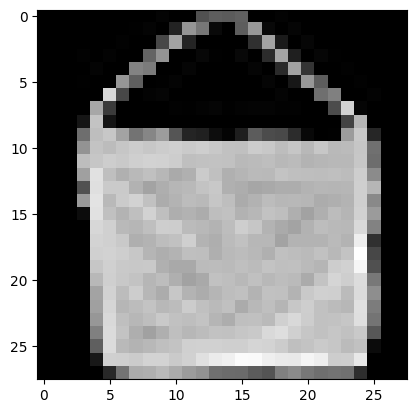

Label: 8


In [20]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=64, shuffle=True)

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
print(train_features.shape)
print(train_features[0].shape)
img = train_features[0].squeeze()  # remove dimension of size 1
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Transforms

In [21]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

In [22]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## Build the Neural Network

In [23]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### device configuration

In [24]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


### define the class

In [25]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


device = ("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork().to(device)
print(model)

X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

print(f"Model structure: {model}\n\n")
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Predicted class: tensor([5], device='cuda:0')
Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0162, -0.0088,  0.0221,  ...,  0.0161,  0.0283, -0.0271],
        [ 0.0015,  0.0286,  0.0284,  ..., -0.0102,  0.0281,  0.0060]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.b

## Automatic Differentiation

In [26]:
import torch

In [27]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

loss.backward()
print(w.grad)
print(b.grad)

z = torch.matmul(x, w) + b
print(z.requires_grad)

Gradient function for z = <AddBackward0 object at 0x000002C4ACCE5300>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x000002C4AE506530>
tensor([[0.0360, 0.3254, 0.0009],
        [0.0360, 0.3254, 0.0009],
        [0.0360, 0.3254, 0.0009],
        [0.0360, 0.3254, 0.0009],
        [0.0360, 0.3254, 0.0009]])
tensor([0.0360, 0.3254, 0.0009])
True


### Disable gradient tracking

In [28]:
with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)

z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False
False


### Tensor gradients and Jacobian products

In [29]:
inp = torch.eye(4, 5, requires_grad=True)
out = (inp + 1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


## Optimizing Model Parameters

In [30]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


model = NeuralNetwork()

learning_rate = 1e-3
batch_size = 64


def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.302630  [   64/60000]
loss: 2.294386  [ 6464/60000]
loss: 2.279310  [12864/60000]
loss: 2.266831  [19264/60000]
loss: 2.256006  [25664/60000]
loss: 2.231220  [32064/60000]
loss: 2.222853  [38464/60000]
loss: 2.197664  [44864/60000]
loss: 2.183412  [51264/60000]
loss: 2.158354  [57664/60000]
Test Error: 
 Accuracy: 52.5%, Avg loss: 2.155817 

Epoch 2
-------------------------------
loss: 2.159009  [   64/60000]
loss: 2.154714  [ 6464/60000]
loss: 2.105333  [12864/60000]
loss: 2.119789  [19264/60000]
loss: 2.066193  [25664/60000]
loss: 2.009903  [32064/60000]
loss: 2.025374  [38464/60000]
loss: 1.951199  [44864/60000]
loss: 1.945468  [51264/60000]
loss: 1.888341  [57664/60000]
Test Error: 
 Accuracy: 59.5%, Avg loss: 1.882840 

Epoch 3
-------------------------------
loss: 1.903739  [   64/60000]
loss: 1.883012  [ 6464/60000]
loss: 1.772325  [12864/60000]
loss: 1.817582  [19264/60000]
loss: 1.698420  [25664/60000]
loss: 1.644513  [32064/600